<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/geometric_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Transformations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request


url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [5]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140 #gray img
u_img = np.uint8(img) #unsigned img

Rotations

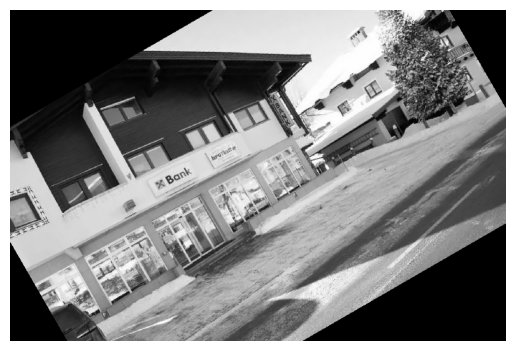

In [19]:
from PIL import Image
angle = 30
new_img = Image.fromarray(g_img)
new_img = new_img.rotate(angle)
plt.imshow(new_img, cmap = 'gray')
plt.axis('off');

Affine transformation

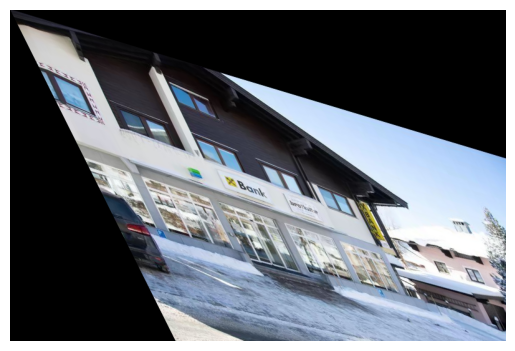

In [53]:
import cv2
T = np.array([[1, 0.5, 0], [0.3, 1, 0]], dtype=float)

new_img = cv2.warpAffine(img, T, (img.shape[1], img.shape[0]))        #Linear T = 3x2
plt.imshow(new_img, cmap = 'gray')
plt.axis('off');

Projective Transformation

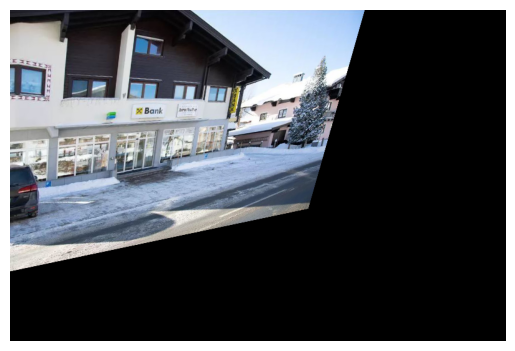

In [67]:
import cv2
T = np.array([[1,0,0], [0, 1, 0], [0.0005,0.0005,1]], dtype=float)

new_img = cv2.warpPerspective(img, T, (img.shape[1], img.shape[0]))     #Affine T = 3x3
plt.imshow(new_img, cmap = 'gray')
plt.axis('off');

Bilinear interpolation

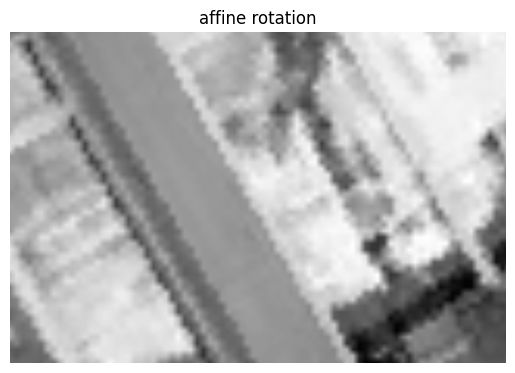

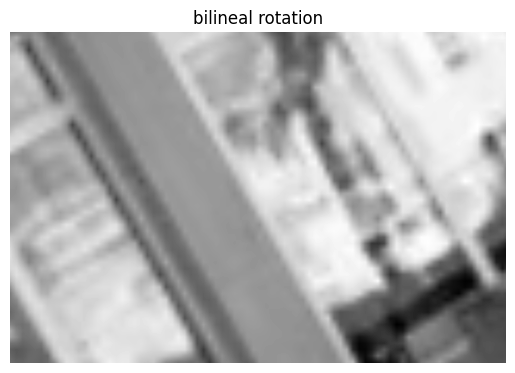

In [84]:
from PIL import Image
angle = 30
new_img = Image.fromarray(g_img)
new_img = new_img.rotate(angle)
new_img = np.uint8(new_img)

T = np.array([[1,0,-300], [0, 1, -300]], dtype=float)
new_img = cv2.warpAffine(new_img, T, (img.shape[1], img.shape[0]))

T = np.array([[10,0,0], [0, 10, 0]], dtype=float)
new_img = cv2.warpAffine(new_img, T, (img.shape[1], img.shape[0]))

plt.imshow(new_img, cmap = 'gray')
plt.axis('off')
plt.title('affine rotation')
plt.figure()

angle = 30
new_img = Image.fromarray(g_img)
new_img = new_img.rotate(angle, resample=Image.BILINEAR)
new_img = np.uint8(new_img)

T = np.array([[1,0,-300], [0, 1, -300]], dtype=float)
new_img = cv2.warpAffine(new_img, T, (img.shape[1], img.shape[0]))

T = np.array([[10,0,0], [0, 10, 0]], dtype=float)
new_img = cv2.warpAffine(new_img, T, (img.shape[1], img.shape[0]))

plt.imshow(new_img, cmap = 'gray')
plt.title('bilineal rotation')
plt.axis('off');